In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import py4DSTEM
import seaborn as sns
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from pyprismatic.process import get_rdims, source_size, apply_poisson_noise_STEM

## Plotting

For simulations, please run simulations in "cc_final.ipynb"

In [ ]:
fp_100 = "outputs/cc/df_series_100kv.h5"
vd = py4DSTEM.io.read(fp_100, data_id=32)
rx, ry = get_rdims(fp_100, "realslices", "virtual_detector_depth0000_df0032")

In [ ]:
dose = 5000 # electrons per probe
kernel_sigma = 0.8/2.355 #80pm FWHM
haadf_img = np.sum(vd.data[:,:,40:],axis=2)
ss = source_size(haadf_img, rx, ry, sigma=kernel_sigma) 
shot = apply_poisson_noise_STEM(ss, dose=dose)

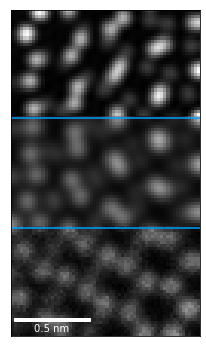

In [15]:
fig = plt.figure(figsize=(3.4, 6))
ax = fig.gca()
imshape = haadf_img.shape
plt_img = np.zeros(imshape)
plt_img[:imshape[0]//3,:] = haadf_img[:imshape[0]//3,:]
plt_img[imshape[0]//3:2*imshape[0]//3,:] = ss[imshape[0]//3:2*imshape[0]//3,:]
plt_img[2*imshape[0]//3:,:] = shot[2*imshape[0]//3:,:]


rs = AnchoredSizeBar(ax.transData,
                           5/0.2, '0.5 nm', 'lower left', 
                           pad=0.2,
                           color='white',
                           frameon=False,
                           size_vertical=1)

ax.add_artist(rs)

ax.matshow(plt_img, cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.axhline(imshape[0]//3, color=(0,255*0.627/255,255/255))
ax.axhline(2*imshape[0]//3, color=(0,255*0.627/255,255/255))
plt.savefig("fig_postprocessing.pdf", bbox_inches="tight")